In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from langdetect import detect
# show all columns
pd.set_option('display.max_columns', None)

In [2]:
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

PROJ: proj_create_from_database: Cannot find proj.db


In [5]:
from keplergl import KeplerGl 
import folium
from folium.plugins import FastMarkerCluster

#### Import data

In [3]:
listings = pd.read_csv('./Airbnb/listings_new_2_distr.csv')
listings = listings.drop(columns=['Unnamed: 0'])


In [5]:
calendar = pd.read_csv('./Airbnb/calendar_clean.csv')
calendar['date'] = pd.to_datetime(calendar['date'])

In [4]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#### Remove outliers

In [7]:
"""
listings = listings[listings['accommodates'] <= 7]
listings = listings[listings['bathrooms'] <= 3]
listings = listings[listings['bedrooms'] <= 4]
listings = listings[listings['beds'] <= 4]
listings = listings[listings['guests_included'] <= 4]
listings = listings[listings['minimum_nights'] <= 5]
listings = listings[listings['price'] > 0]
listings = listings[listings['price'] <= 239]

"""

"\nlistings = listings[listings['accommodates'] <= 7]\nlistings = listings[listings['bathrooms'] <= 3]\nlistings = listings[listings['bedrooms'] <= 4]\nlistings = listings[listings['beds'] <= 4]\nlistings = listings[listings['guests_included'] <= 4]\nlistings = listings[listings['minimum_nights'] <= 5]\nlistings = listings[listings['price'] > 0]\nlistings = listings[listings['price'] <= 239]\n\n"

#### Visualizations

In [5]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

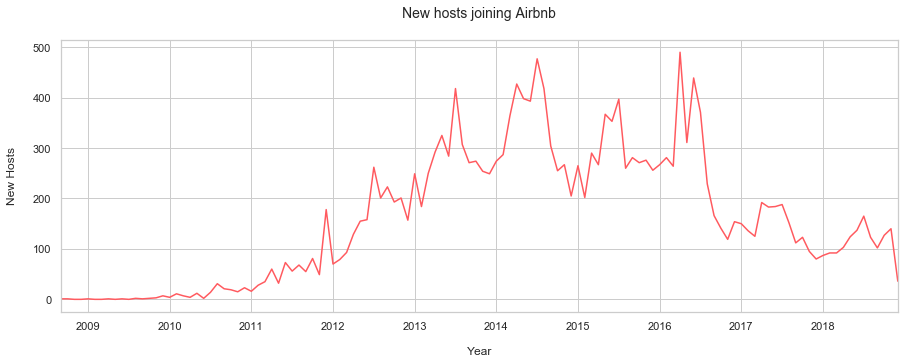

In [14]:
plt.figure(figsize=(15,5))
listings.set_index('host_since').resample('MS').size().plot(color ='#FF5A5F')
plt.xlabel('\nYear')
plt.ylabel('New Hosts\n')
plt.title('New hosts joining Airbnb\n', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Listings per Neighbourhood\n')

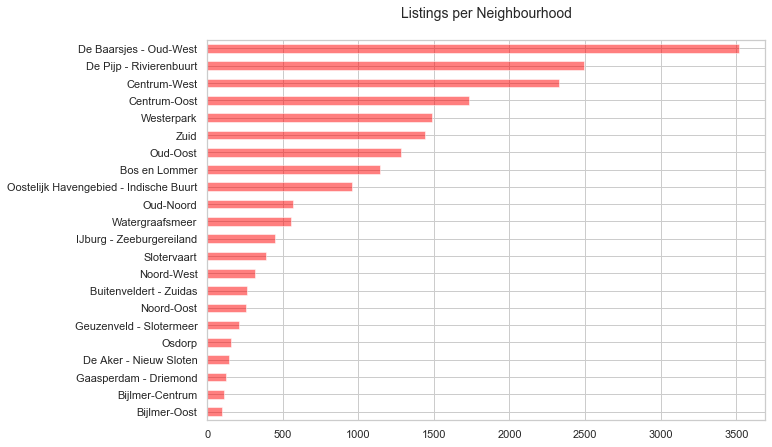

In [15]:
# Listings per Neighbourhood

plt.subplots(figsize=(10, 7))
listings['neighbourhood'].value_counts(ascending=True).plot.barh(facecolor='red', alpha=0.5)
plt.title('Listings per Neighbourhood\n', fontsize=14)

Text(0.5, 1.0, 'Listings per room type\n')

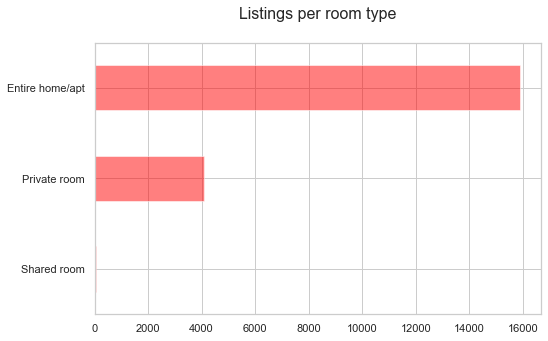

In [16]:
# Listings per room type

plt.subplots(figsize=(8,5))
listings['room_type'].value_counts(ascending=True).plot.barh(facecolor='red', alpha=0.5)
plt.title('Listings per room type\n', fontsize=16)

In [17]:
x = listings['room_type'].value_counts()
y = pd.DataFrame(x)
y

,room_type
Entire home/apt,15889
Private room,4076
Shared room,65


Text(0.5, 1.0, 'Listings per property type\n')

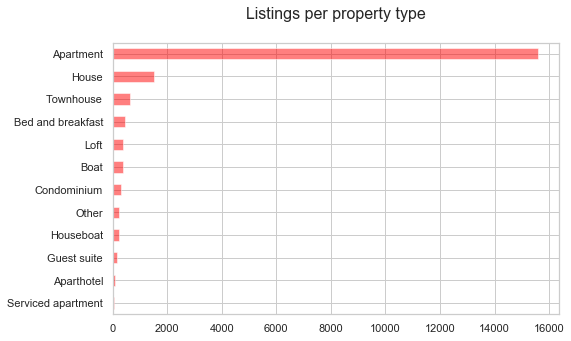

In [14]:
# Listings per property type

plt.subplots(figsize=(8,5))
listings['property_type'].value_counts(ascending=True).plot.barh(facecolor='red', alpha=0.5)
plt.title('Listings per property type\n', fontsize=16)

Text(0.5, 1.0, 'Listings per District\n')

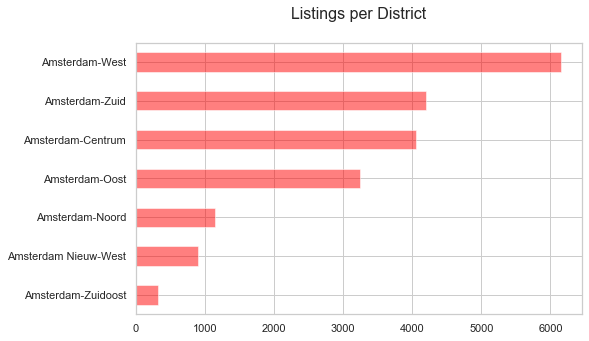

In [15]:
# Listings per District

plt.subplots(figsize=(8,5))
listings['district'].value_counts(ascending=True).plot.barh(facecolor='red', alpha=0.5)
plt.title('Listings per District\n', fontsize=16)

Text(0.5, 1.0, 'Listings per property type\n')

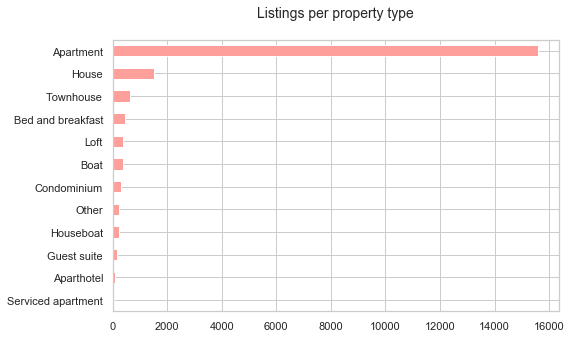

In [16]:
# Listings per property type

plt.subplots(figsize=(8,5))
listings['property_type'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per property type\n', fontsize=14)

In [31]:
# Avg daily price per neighborhood

df2 = pd.DataFrame(listings.groupby('neighbourhood')['price'].mean().reset_index())
df3 = df2.sort_values(by=['price'], ascending=False)
df3

,neighbourhood,price
5,Centrum-West,141.505288
4,Centrum-Oost,138.030769
8,De Pijp - Rivierenbuurt,129.244565
21,Zuid,127.779909
17,Oud-Oost,125.076225
20,Westerpark,124.993050
7,De Baarsjes - Oud-West,124.076742
11,IJburg - Zeeburgereiland,119.470588
19,Watergraafsmeer,118.115023
16,Oud-Noord,116.624724


Text(0, 0.5, ' ')

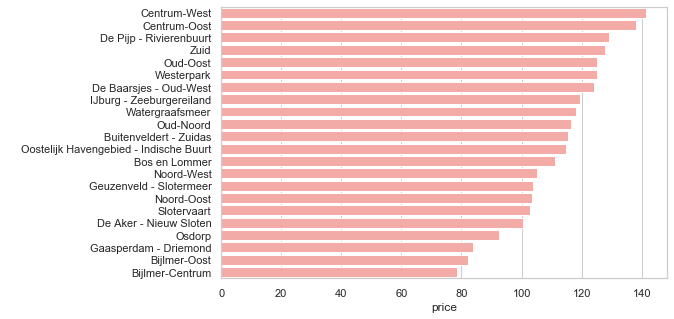

In [32]:
# Price per neighborhood

plt.subplots(figsize=(8,5))
ax = sns.barplot(x="price", y="neighbourhood", data=df3,color='r')
ax.set_ylabel(' ')

In [18]:
# Avg daily price per district

df2 = pd.DataFrame(listings.groupby('district')['price'].mean().reset_index())
df3 = df2.sort_values(by=['price'], ascending=False)
df3

,district,price
1,Amsterdam-Centrum,189.688116
5,Amsterdam-Zuid,161.713298
3,Amsterdam-Oost,140.313097
2,Amsterdam-Noord,138.486934
4,Amsterdam-West,138.160488
0,Amsterdam Nieuw-West,116.071744
6,Amsterdam-Zuidoost,94.583587


Text(0, 0.5, ' ')

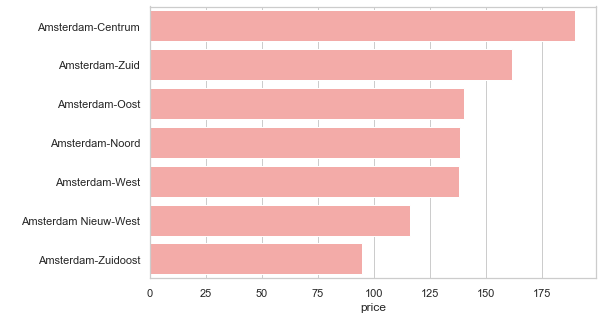

In [19]:
# Price per district
plt.subplots(figsize=(8,5))
ax = sns.barplot(x="price", y="district", data=df3, color='r')
ax.set_ylabel(' ')

In [132]:
# Neighborhoods witht he highest rated listings

df2 = pd.DataFrame(listings.groupby('neighbourhood')['review_scores_rating'].mean().reset_index())
df3 = df2.sort_values(by=['review_scores_rating'], ascending=False)
df3

,neighbourhood,review_scores_rating
6,De Aker - Nieuw Sloten,95.747748
11,IJburg - Zeeburgereiland,95.618667
21,Zuid,95.506612
2,Bos en Lommer,95.323353
7,De Baarsjes - Oud-West,95.289075
17,Oud-Oost,95.214161
18,Slotervaart,95.071217
20,Westerpark,95.065102
13,Noord-West,95.040146
19,Watergraafsmeer,94.927632


Text(0.5, 1.0, 'Listings per cancellation_policy\n')

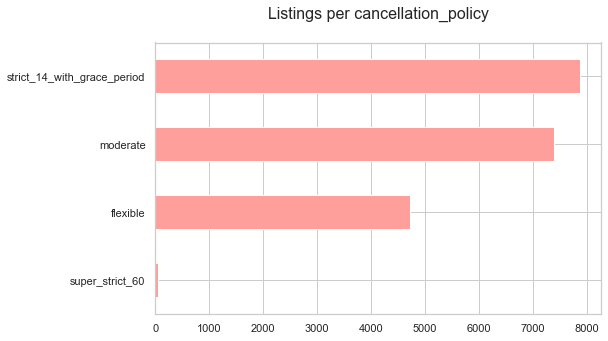

In [135]:
plt.subplots(figsize=(8,5))
listings['cancellation_policy'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per cancellation_policy\n', fontsize=16)

In [159]:
calendar.head()

,Unnamed: 0,listing_id,date,available,price
0,240,255809,2019-12-05,t,150.0
1,241,255809,2019-12-04,t,150.0
2,242,255809,2019-12-03,t,150.0
3,243,255809,2019-12-02,t,150.0
4,244,255809,2019-12-01,t,150.0


In [160]:
calendar.dtypes

Unnamed: 0             int64
listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

### Kepler gl Map

In [15]:
df = listings[["id", 'neighbourhood', 'latitude', 'longitude', 'price', 'host_response_time', 'host_is_superhost',
              'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'minimum_nights',
              'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'cancellation_policy', 'district']]

In [7]:
df2 = df[['latitude', 'longitude', 'room_type', 'accommodates']]

In [18]:
map_3 = KeplerGl(height=500)
map_3

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=500)

In [19]:
map_3.add_data(data=df, name='data_3')

In [49]:
#map_1.save_to_html(file_name="my_map.html")

Map saved to my_map.html!


### Folium Map

In [ ]:
lat = listings['latitude'].tolist()
lon = listings['longitude'].tolist()
locations = list(zip(lat, lon))

In [27]:
map1 = folium.Map(location=[52.3717, 4.9021], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1